In [1]:
import os
import random
import torchaudio
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa
from pprint import pprint

In [2]:
#create a file with names of cricket audio file: raw data (later to be used to shuffle and use them as train and test data)
wav_dir = "/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_audio/wav_audio/"
wav_files_list = sorted(file for file in os.listdir(wav_dir) if os.path.isfile(os.path.join(wav_dir, file)))
datafile_path = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/raw_data.txt'

In [3]:
print(wav_files_list[0])

Copy of Acheta domesticus (SINA).MP3


In [4]:
print(len(wav_files_list))
#store the filenames of audio in a text file
with open(datafile_path, 'w') as data:
  for item in wav_files_list:
    data.write(item + "\n")

441


In [5]:
#read the text file 
datafile = datafile_path
with open(datafile, 'r') as file:
  lines = [line.strip() for line in file.readlines()]
# print(lines)
print(len(lines))

441


In [6]:
#Get the genus name. "Copy of Acheta domesticus 1 (MCL).WAV" Here the genus name is Acheta.
def get_genus(line):
    if "Copy of" in line:
        return line.split("Copy of ")[1].split(" ")[0]
    return None


In [7]:
#create a dictionary genus_dict to store the filenames against each genus
def genus_and_filenames(lines):
    genus_dict = {}
    for line in lines:
        genus_name = get_genus(line)
        if genus_name in genus_dict:
            genus_dict[genus_name].append(line)
        else:
            genus_dict[genus_name] = [line]

    return genus_dict

In [8]:
#There are total 26 distinct genuses
genus_dict = genus_and_filenames(lines)
print(len(genus_dict))
print(genus_dict['Acheta'])

26
['Copy of Acheta domesticus (SINA).MP3', 'Copy of Acheta domesticus 1 (MCL).WAV', 'Copy of Acheta domesticus 2 (MCL).WAV', 'Copy of Acheta domesticus 3 (MCL).WAV', 'Copy of Acheta domesticus 4 (MCL).WAV']


In [9]:
#get the number of audio files for each species. we will later filter on audio files with minimum 30 files.
def get_filecount_per_genus(genus_dict):
    genus_file_count = {}
    
    for genus,files in genus_dict.items():
      genus_file_count[genus] = len(files)

    return genus_file_count
 

In [10]:
genus_file_count = get_filecount_per_genus(genus_dict)
genus_file_count = dict(sorted(genus_file_count.items(), key = lambda item: item[1]))
print(genus_file_count)

{'Gryllita': 1, 'Gryllodes': 1, 'Anurogryllus': 2, 'Neoscapteriscus': 2, 'Antillicharis': 3, 'Hoplosphyrum': 4, 'Miogryllus': 4, 'Xenogryllus': 4, 'Acheta': 5, 'Hygronemobius': 5, 'Neoxabea': 5, 'Phyllopalpus': 5, 'Velarifictorus': 5, 'Neocurtilla': 6, 'Gryllotalpa': 8, 'Hapithus': 11, 'Pictonemobius': 13, 'Eunemobius': 15, 'Neonemobius': 16, 'Cyrtoxipha': 17, 'Orocharis': 21, 'Anaxipha': 34, 'Allonemobius': 43, 'Oecanthus': 64, 'Gryllus': 72, 'Cycloptilum': 75}


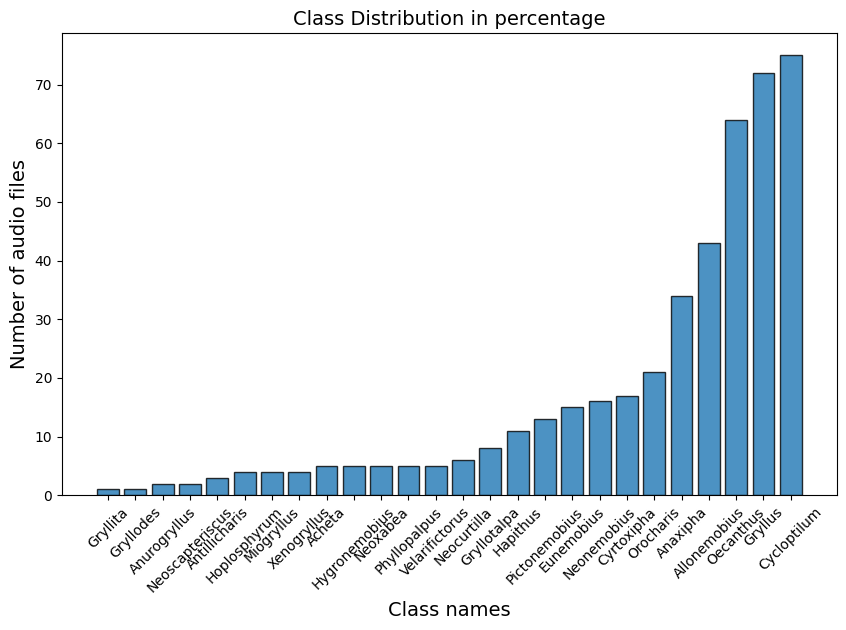

In [15]:
# class distribution of genus
classes = list(genus_file_count.keys())
samples = list(genus_file_count.values())

#create a histogram
plt.figure(figsize = (10,6))
plt.bar(classes, samples, edgecolor = 'black', alpha = 0.8)
plt.xlabel("Class names",fontsize = 14)
plt.ylabel("Number of audio files",fontsize=14)
plt.title("Class Distribution in percentage",fontsize= 14)
plt.xticks(rotation = 45, fontsize = 10) #rotate x-axis labels for readability

# plt.show()

dpi = 80
figurename = "genus_class_distribution_plot.png"
plt.savefig(figurename, dpi=dpi)

In [12]:
#get duration for all the audio files
def get_duration_genus(wav_file_list):
    duration_list = {}
    for wav_file in tqdm(wav_file_list):
        wav,sr = librosa.load(wav_dir + wav_file)
        duration = librosa.get_duration(y = wav)
        duration_list[wav_file] = duration
    return duration_list

In [13]:
wav_file_duration = get_duration_genus(wav_files_list)
print(wav_file_duration['Copy of Acheta domesticus (SINA).MP3'])

100%|█████████████████████████████████████████| 441/441 [00:59<00:00,  7.43it/s]

20.140408163265306


In [14]:
min_duration = min(wav_file_duration,key = wav_file_duration.get)
print(min_duration, wav_file_duration[min_duration])

Copy of Oecanthus salvii (SINA).mp3 4.179591836734694


In [15]:
print(dict(sorted(wav_file_duration.items(), key = lambda item: item[1])))

{'Copy of Oecanthus salvii (SINA).mp3': 4.179591836734694, 'Copy of Neonemobius eurynotus (SINA).mp3': 5.198367346938776, 'Copy of Oecanthus walkeri (SINA).mp3': 5.945804988662132, 'Copy of Allonemobius fasciatus (SINA).mp3': 7.874421768707483, 'Copy of Oecanthus laricis (SINA).mp3': 8.021133786848072, 'Copy of Gryllus rubens (SINA).mp3': 9.195102040816327, 'Copy of Gryllus personatus (SINA).mp3': 9.974739229024943, 'Copy of Gryllus cayensis (SINA).mp3': 9.988208616780046, 'Copy of Allonemobius socius 3 (MCL).WAV': 10.397460317460318, 'Copy of Orocharis nigrifrons (SINA).mp3': 11.003628117913832, 'Copy of Oecanthus texensis (SINA).mp3': 11.079365079365079, 'Copy of Gryllus vocalis (SINA).mp3': 11.208390022675736, 'Copy of Eunemobius confusus (SINA).mp3': 11.230294784580499, 'Copy of Gryllus lineaticeps (SINA).mp3': 11.241224489795918, 'Copy of Oecanthus varicornis 1 (MCL).WAV': 11.325260770975056, 'Copy of Cycloptilum squamosum 1 (MCL).WAV': 11.326757369614512, 'Copy of Cycloptilum kel

In [26]:
max_duration = max(wav_file_duration,key = wav_file_duration.get)
print(max_duration, wav_file_duration[max_duration])

Copy of Oecanthus fultoni 1 (MCL).WAV 1678.9087528344671


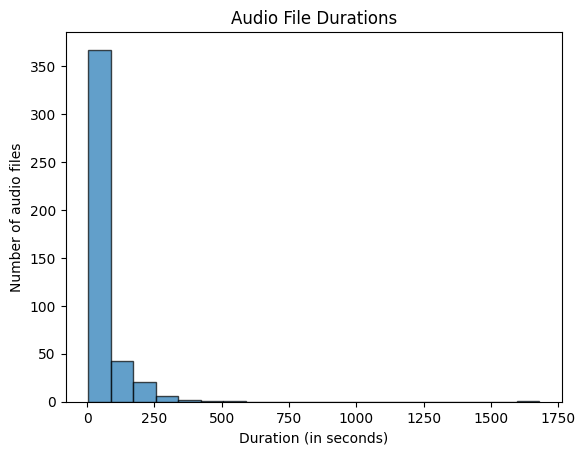

In [33]:
#plot a distribution histogram for duration and numebr of files in the range of that duration
durations = list(wav_file_duration.values())

#create histogram to show the distribution of the sudio files on duration of audio
plt.hist(durations, bins =20, edgecolor = 'black', alpha = 0.7)

# plt.xticks(range(0, int(max(durations)) + 1, 100))
# plt.yticks(range(0, len(durations) + 1, 20))

plt.title("Audio File Durations")
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of audio files")
#plt.grid(True)
plt.show()


In [11]:
#filter the genus files with duration greater than 10 seconds and atleast some number of audio files
def filter_genus_filecount(wav_file_list,sec,num):
    waveform_list = {}
    wavfile_list_duration = {}
    for iter, wav_file in enumerate(tqdm(wav_file_list)):
      genus_name = get_genus(wav_file)
      wav,sample_rate = librosa.load(wav_dir + wav_file)  
      duration = librosa.get_duration(y = wav)  
      if duration >= sec and genus_file_count[genus_name] > num: # 10 seconds atleast and number of audio files atleast num
        wavfile_list_duration[wav_file] = duration
        waveform_list[wav_file] = wav

    return waveform_list,wavfile_list_duration

In [12]:
#for 3 genus
waveform_list_gt60, duration_list_gt60 = filter_genus_filecount(wav_files_list, 10, 60) #281 number of files
print(len(waveform_list_gt60))

100%|█████████████████████████████████████████| 441/441 [01:08<00:00,  6.44it/s]

205


In [79]:
#for 5 genuses (( with greater than 30 files and >= 10 sec))
waveform_list_gt30, duration_list_gt30 = filter_genus_filecount(wav_files_list, 10, 30) #281 number of files
print(len(waveform_list_gt30))

100%|█████████████████████████████████████████| 441/441 [00:18<00:00, 24.15it/s]

281


In [81]:
#for 8 genuses ( with greater than 15 files and >= 10 sec)
waveform_list_gt15, duration_list_gt15 = filter_genus_filecount(wav_files_list, 10, 15) #334 number of files
print(len(waveform_list_gt15))

100%|█████████████████████████████████████████| 441/441 [00:18<00:00, 24.06it/s]

334


In [82]:
#for 11 genuses ( with greater than 10 files and >= 10 sec)
waveform_list_gt10, duration_list_gt10 = filter_genus_filecount(wav_files_list, 10, 10) #373 number of files
print(len(waveform_list_gt10))

100%|█████████████████████████████████████████| 441/441 [00:18<00:00, 24.17it/s]

373


In [13]:
#write the filenames into text file
def write_into_text(path,wav_files_list):
    with open(path, 'w') as data:
      for key,item in wav_files_list.items():
        data.write(key + "\n")

In [14]:
path = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/3_genus/raw_3.txt'
write_into_text(path,waveform_list_gt60)

In [83]:
path = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/5_genus/raw_5.txt'
write_into_text(path,waveform_list_gt30)

In [84]:
path = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/8_genus/raw_8.txt'
write_into_text(path,waveform_list_gt15)
path = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/11_genus/raw_11.txt'
write_into_text(path,waveform_list_gt10)

In [15]:
genus_gt60 = genus_and_filenames(waveform_list_gt60)
print(len(genus_gt60))

3


In [85]:
# store the filenames corresponding to their genuses in each set.
#check how many genuses in each set (number of files >=30, >=15, >=10 )
genus_gt30 = genus_and_filenames(waveform_list_gt30)
genus_gt15 = genus_and_filenames(waveform_list_gt15)
genus_gt10 = genus_and_filenames(waveform_list_gt10)

In [86]:
print(len(genus_gt30))
print(len(genus_gt15))
print(len(genus_gt10))

5
8
11


In [92]:
print(genus_gt30['Allonemobius'])


['Copy of Allonemobius allardi (SINA).mp3', 'Copy of Allonemobius allardi 1 (MCL).WAV', 'Copy of Allonemobius allardi 2 (MCL).WAV', 'Copy of Allonemobius allardi 3 (MCL).WAV', 'Copy of Allonemobius allardi 4 (MCL).WAV', 'Copy of Allonemobius fasciatus 1 (MCL).WAV', 'Copy of Allonemobius fasciatus 2 (MCL).WAV', 'Copy of Allonemobius fasciatus 3 (MCL).WAV', 'Copy of Allonemobius fasciatus 4 (MCL).WAV', 'Copy of Allonemobius fultoni (SINA).mp3', 'Copy of Allonemobius fultoni 1 (MCL).WAV', 'Copy of Allonemobius fultoni 2 (MCL).WAV', 'Copy of Allonemobius fultoni 3 (MCL).WAV', 'Copy of Allonemobius griseus (SINA).mp3', 'Copy of Allonemobius griseus 1 (MCL).WAV', 'Copy of Allonemobius griseus 2 (MCL).WAV', 'Copy of Allonemobius griseus 3 (MCL).WAV', 'Copy of Allonemobius maculatus (SINA).mp3', 'Copy of Allonemobius maculatus 1 (MCL).WAV', 'Copy of Allonemobius maculatus 2 (MCL).WAV', 'Copy of Allonemobius maculatus 3 (MCL).WAV', 'Copy of Allonemobius shalontaki (MCL).WAV', 'Copy of Allonemob

In [17]:
print(genus_gt60['Gryllus'])

['Copy of Gryllus armatus (SINA).mp3', 'Copy of Gryllus assimilis (SINA).mp3', 'Copy of Gryllus brevicaudus  (SINA).mp3', 'Copy of Gryllus chisosensis (SINA).mp3', 'Copy of Gryllus cohni (SINA).mp3', 'Copy of Gryllus firmus (SINA).mp3', 'Copy of Gryllus firmus 1 (MCL).WAV', 'Copy of Gryllus firmus 2 (MCL).WAV', 'Copy of Gryllus firmus 3 (MCL).WAV', 'Copy of Gryllus firmus 4 (MCL).WAV', 'Copy of Gryllus fultoni (SINA).mp3', 'Copy of Gryllus fultoni 1 (MCL).WAV', 'Copy of Gryllus fultoni 2 (MCL).WAV', 'Copy of Gryllus fultoni 3 (MCL).WAV', 'Copy of Gryllus fultoni 4 (MCL).WAV', 'Copy of Gryllus integer (SINA).mp3', 'Copy of Gryllus integer 1 (MCL).WAV', 'Copy of Gryllus integer 2 (MCL).WAV', 'Copy of Gryllus integer 3 (MCL).WAV', 'Copy of Gryllus integer 4 (MCL).WAV', 'Copy of Gryllus integer 5 (MCL).WAV', 'Copy of Gryllus leei (SINA).mp3', 'Copy of Gryllus lightfooti (SINA).mp3', 'Copy of Gryllus lineaticeps (SINA).mp3', 'Copy of Gryllus longicercus (SINA).mp3', 'Copy of Gryllus makhosi

In [18]:
#shuffle and make two lists
def suffle_filenames(genus_filename_list):
    list1,list2 = [],[]
    for genus,item in genus_filename_list.items():
      random.shuffle(item)
      split_at = int(0.8 * len(item))
      list1.extend(item[:split_at])
      list2.extend(item[split_at:])
    return list1,list2

In [20]:
list1_gt60, list2_gt60 = suffle_filenames(genus_gt60) # 3 genus set, with greater than 60 files
print(len(list1_gt60),len(list2_gt60)) #train set length, test set length (163,42)

163 42


In [94]:
list1_gt30, list2_gt30 = suffle_filenames(genus_gt30) # 5 genus set, with greater than 30 files
list1_gt15, list2_gt15 = suffle_filenames(genus_gt15) # 8 genus set, with greater than 15 files
list1_gt10, list2_gt10 = suffle_filenames(genus_gt10) # 11 genus set, with greater than 10 files


In [96]:
print(len(list1_gt30),len(list2_gt30)) #train set length, test set length (223,58)
print(len(list1_gt15),len(list2_gt15)) #train set length, test set length (264,70)
print(len(list1_gt10),len(list2_gt10)) #train set length, test set length (294,79)

223 58
264 70
294 79


In [21]:
#Save the train and test file names in text file. to be used in preprocessing
def save_text_to_file(filepath, list):
  with open(filepath, 'w') as fp:
    for item in list:
      fp.write(f"{item}\n")

In [22]:
#3 genus
train_path3 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/3_genus/train.txt'
test_path3 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/3_genus/test.txt'
save_text_to_file(train_path3, list1_gt60)
save_text_to_file(test_path3, list2_gt60)

In [99]:
#5 genus
train_path5 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/5_genus/train.txt'
test_path5 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/5_genus/test.txt'
#8 genus
train_path8 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/8_genus/train.txt'
test_path8 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/8_genus/test.txt'
#11 genus
train_path11 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/11_genus/train.txt'
test_path11 = r'/gpfs/proj1/choe_lab/tanu/Genus_classification/raw_data/11_genus/test.txt'

In [100]:
#5 genus
save_text_to_file(train_path5, list1_gt30)
save_text_to_file(test_path5, list2_gt30)
#8 genus
save_text_to_file(train_path8, list1_gt15)
save_text_to_file(test_path8, list2_gt15)
#11 genus
save_text_to_file(train_path11, list1_gt10)
save_text_to_file(test_path11, list2_gt10)

In [ ]:
##Testing the duration histogram 

In [58]:
print(len(duration_list_gte10sec))

281


In [35]:
waveform_lessthan10sec, duration_list = filter_genus_filecount(wav_files_list)

100%|█████████████████████████████████████████| 441/441 [00:17<00:00, 25.02it/s]


In [37]:
print(len(duration_list))

8


In [39]:
waveform_lessthan15sec, duration_list_15sec = filter_genus_filecount(wav_files_list,15)
print(len(duration_list_15sec))

100%|█████████████████████████████████████████| 441/441 [00:17<00:00, 24.54it/s]

45


In [49]:
waveform_lessthan250sec, duration_list_500sec = filter_genus_filecount(wav_files_list,500)
print(len(duration_list_500sec))

100%|█████████████████████████████████████████| 441/441 [00:18<00:00, 24.47it/s]

439


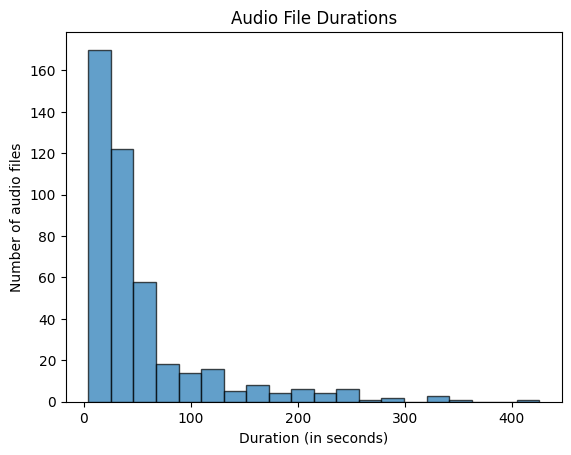

In [50]:
#plot a distribution histogram for duration and numebr of files in the range of that duration
durations = list(duration_list_500sec.values())

#create histogram to show the distribution of the sudio files on duration of audio
plt.hist(durations, bins =20, edgecolor = 'black', alpha = 0.7)

# plt.xticks(range(0, int(max(durations)) + 1, 100))
# plt.yticks(range(0, len(durations) + 1, 20))

plt.title("Audio File Durations")
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of audio files")
#plt.grid(True)
plt.show()

In [56]:
print(duration_list)

{'Copy of Allonemobius fasciatus (SINA).mp3': 7.874421768707483, 'Copy of Gryllus cayensis (SINA).mp3': 9.988208616780046, 'Copy of Gryllus personatus (SINA).mp3': 9.974739229024943, 'Copy of Gryllus rubens (SINA).mp3': 9.195102040816327, 'Copy of Neonemobius eurynotus (SINA).mp3': 5.198367346938776, 'Copy of Oecanthus laricis (SINA).mp3': 8.021133786848072, 'Copy of Oecanthus salvii (SINA).mp3': 4.179591836734694, 'Copy of Oecanthus walkeri (SINA).mp3': 5.945804988662132}
